## Logistic Regression

In this notebook, we'll walk step-by-step through performing logistic regression using the Titanic dataset. We'll cover each of the following steps clearly and thoroughly:

1. Loading and inspecting the dataset.
2. Preprocessing: Handling missing values and encoding categorical data.
3. Splitting the data into training and testing sets.
4. Training a logistic regression model.
5. Evaluating the model's performance.
6. Checking assumptions for logistic regression.
7. Interpreting the model's results clearly.

### **Step 1: Load and Inspect the Data**
We'll use the Titanic dataset, a popular dataset for predicting passenger survival based on various features.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Load Titanic dataset in seaborn
df = sns.load_dataset('titanic')

# Inspect the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## **Step 2: Preprocess the Data**
Before training our model, we must prepare the dataset. This step involves two key processes:

*2.1 Handle Missing Values*
Logistic regression requires datasets without missing values, so we remove rows with missing data in important columns (age, embarked).

*2.2 Encode Categorical Variables*
Machine learning algorithms require numerical inputs. Therefore, categorical variables (sex, embarked) must be converted into numeric form using one-hot encoding.

- Why encoding?
    - Converts categorical labels into numeric values that the model can interpret.
    - Avoids misinterpretation of categorical variables as numeric variables (e.g., treating "male" as numerically greater or less than "female").

In [3]:
# Handling missing values
#df.info()
df.isna().sum()
df = df.dropna(subset=['age'])#only drops rows where age variable is missing 
# Encoding categorical variables
df = pd.get_dummies(df, columns=['sex'], drop_first=True)#making sex column numeric (True and False are read as 1 and 0 respectively)
# Use drop_first = True to avoid "dummy trap", use drop_first = True

# Define features and target
features = ["pclass", "age", "sibsp", "parch", "fare", "sex_male"]

X = df[features]
y = df["survived"]

# Preview the cleaned dataset
print(X.head())
print(y.head())

   pclass   age  sibsp  parch     fare  sex_male
0       3  22.0      1      0   7.2500      True
1       1  38.0      1      0  71.2833     False
2       3  26.0      0      0   7.9250     False
3       1  35.0      1      0  53.1000     False
4       3  35.0      0      0   8.0500      True
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


## **Step 3: Split the Data**
We divide our dataset into two subsets:
- *Training Set*: To build our logistic regression model.
- *Testing Set*: To evaluate the performance of our model.

In [4]:
from sklearn.model_selection import train_test_split
# Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2, 
                                                    random_state= 42)

## **Step 4: Train the Logistic Regression Model**
We'll now build and train our logistic regression model using the training data.

In [5]:
from sklearn.linear_model import LogisticRegression 
# Initialize and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Step 5: Evaluate the Model**
To understand how well our model predicts survival, we use the following evaluation metrics:
- *Accuracy*: Proportion of correct predictions.
- *Confusion Matrix*: Breakdown of predictions (True positives, True negatives, False positives, False negatives).
- *Classification Report*: Precision, recall, and F1-score.

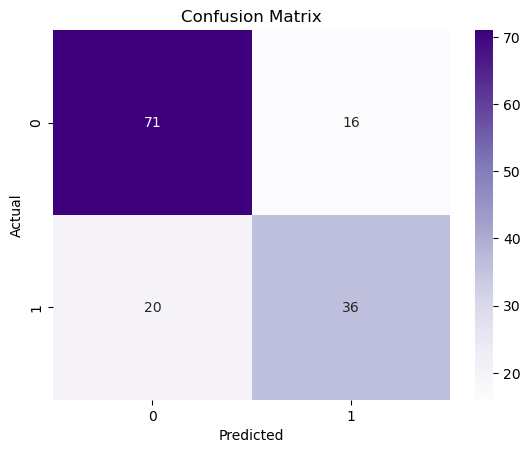

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = logreg.predict(X_test)
#y_pred

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
#accuracy

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
#cm
sns.heatmap(cm, annot=True,
            cmap= "Purples")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))

## **Step 6: Examining and Interpreting the Model**
After training our logistic regression model, let's examine the coefficients to understand their meaning in more detail.
- Coefficients in logistic regression represent the effect of each feature on the log-odds of the target (survival in this case).
- Positive coefficients increase the odds of the outcome (survival).
- Negative coefficients decrease the odds of the outcome (survival).
- The magnitude of coefficients shows the strength of each feature's influence.

### 6.1 Interpreting Coefficients
After training our logistic regression model, let's examine the coefficients to understand their meaning in more detail.
- Coefficients in logistic regression represent the effect of each feature on the log-odds of the target (survival in this case).
- Positive coefficients increase the odds of the outcome (survival).
- Negative coefficients decrease the odds of the outcome (survival).
- The magnitude of coefficients shows the strength of each feature's influence.

Output:
- Coefficient Interpretation:
    - Positive coefficients: Increase the log-odds (and thus probability) of survival.
    - Negative coefficients: Decrease the log-odds (and thus probability) of survival.



| Feature      | Coefficient | Impact on Survival Probability                      | Explanation                                                    |
|--------------|-------------|-----------------------------------------------------|----------------------------------------------------------------|
| `pclass`     | -1.21       | Decreases                                           | Lower passenger classes (higher numeric values) decrease survival odds.            |
| `age`        | -0.04       | Slight negative impact                              | Older passengers have slightly lower odds of survival.         |
| `sibsp`      | -0.35       | Negative impact                                     | Having more siblings/spouses aboard decreases survival odds.   |
| `parch`      | -0.05       | Slight negative impact                              | Having more parents/children aboard slightly reduces odds.     |
| `fare`       | 0.002      | Very slight positive impact                         | Paying higher fares slightly increases survival odds.          |
| `sex_male`   | -2.61       | Strong negative impact                              | Being male greatly decreases the probability of survival.      |
| **Intercept**| 5.47        | Baseline log-odds                                   | Baseline survival odds for females with lowest-class, fare, age, ect. |


In [21]:
# Extract coefficients and intercept
coef = pd.Series(logreg.coef_[0], index = features)
intercept = logreg.intercept_[0]
# Display coefficients
print(coef)
print(intercept)

pclass     -1.214597
age        -0.048975
sibsp      -0.354585
parch      -0.057060
fare        0.002071
sex_male   -2.615910
dtype: float64
5.474447197360071


### 6.2 Understanding the `predict_proba` Function
Logistic regression outputs probabilities between 0 and 1, indicating the likelihood of belonging to a specific class.
- The function predict_proba() returns two columns:
    - Probability of class 0 (not survived).
    - Probability of class 1 (survived).
- Output:
    - Each row gives the probability of not surviving (first column) and surviving (second column).
    - Useful for making informed decisions based on probabilities rather than just binary predictions.

In [23]:
# Get predicted probabilities for the test set
print(logreg.predict_proba(X_test)[:5])

# Display probabilities for first 5 test observations
X_test

[[0.83211199 0.16788801]
 [0.52258537 0.47741463]
 [0.21011358 0.78988642]
 [0.03812736 0.96187264]
 [0.94673821 0.05326179]]


,pclass,age,sibsp,parch,fare,sex_male
149,2,42.0,0,0,13.0000,True
407,2,3.0,1,1,18.7500,True
53,2,29.0,1,0,26.0000,False
369,1,24.0,0,0,69.3000,False
818,3,43.0,0,0,6.4500,True
...,...,...,...,...,...,...
819,3,10.0,3,2,27.9000,True
164,3,1.0,4,1,39.6875,True
363,3,35.0,0,0,7.0500,True
56,2,21.0,0,0,10.5000,False


In [25]:
#reverse engineering odds and probability from log odds 
odds = np.exp(-2.61)#-2.61 comes from sex coefficient 
probs = odds/(1+ odds)
probs 

0.0684976037243261

In [32]:
fake = pd.Series([1, 19, 3, 1, 26, 1])
print(logreg.predict([fake]))
print(logreg.predict_proba([fake]))
#oh well i would be dead 

[0]
[[0.58747993 0.41252007]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
